# Demand

In [7]:
# HIDDEN
from datascience import *

import sympy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-muted')
%matplotlib inline

from IPython.display import display
import numpy as np
import pandas as pd
solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"

import warnings
warnings.filterwarnings('ignore')

In this chapter, we will explore one of the most foundational yet important concepts in economics: demand curves. 

## Modeling the Demand Curve
The demand curve shows the graphical relationship between the price of a good or service and the quantity demanded for it over a given period of time. 
In other words, it shows the quantity of goods or services consumers are willing to buy at each market price. 
The quantity of goods or services demanded or supplied can be modeled as a function of price, as in:  $$\text{Quantity} = f(\text{Price})$$

Notably, the curve is downwards sloping because of the law of demand, which states that *as the price of a good or service increases, the quantity demanded for it decreases, assuming all other factors are held constant*. 
This should make intuitive sense: as prices increase, fewer people are willing to pay the higher price for the same good. 
On the other hand, as prices decrease, more people are willing to pay the lower price for the same good. 
Hence, the quantity demanded of a good or service has an inverse relationship with the price. 
In this course, we will assume that the relationship is somewhat linear and can be described as $$\text{Quantity}_{d}=a * \text{Price}_{d} + b$$

We can interpret the equation above as follows: *as the price of a unit increases by 1, there is an $a$ unit increase (or decrease, if $a$ is negative$ in the quantity demanded.* 
For example, $$\text{Quantity}_{d}=-2 \text{Price}_{d} + 3$$ would suggest that a price increase by 1 would decrease overall quantity demanded in the market by 2.  

Oppositely, price can also be measured as function of quantity to denote demand. 
In this case, we use an inverse demand function, as it is the inverse function of the demand function above. 
Since price is a function of quantity, $$\text{Price} = f(\text{Quantity})$$.
Because in this case we are solving for the inverse of the previous demand function, the inverse demand function for the example above is $$\text{Price}_{d}=-\frac{1}{2}\text{Quantity}_{d}-3/2$$.

## Shifts in Demand Curve 

The demand curve can shift in or out based on exogenous events that occur outside of the market. 
Some factors other than a change in price of the good/service could be changes in:

*  buyer's income
*  consumer preferences
*  expectation of future price/supply/demand
*  changes in the price of related goods

If any of these changes occur and causes the demand for the selected good/service to decrease, then the curve shifts to the left as less of the good or service will be demanded at every price.
Similarly, if any of these changes causes the demand for the selected good/service to increase, the curve would shift to the right.
For example, consumers' incomes decreased during the 2008 recession, thus decreasing overall buying power and shifting the demand curve leftwards; a left shift in the demand curve suggests that consumers would purchase fewer quantities of goods.

## An Empirical Example: Fruits

We will now explore the relationship between price and quantity of oranges produced between 1924 and 1938. 
Since the data is from the 1920's and 1930's, it is important to remember that the prices are much lower than what they would be today because of inflation, competition, innovations, and other factors. 
For example, in 1924, a ton of oranges would have costed 6.63 dollars; that same amount in 2019 is 100.78 dollars. 


The source of this dataset is S. Hoos (1941). "An Investigation on Complementarity Relations Between
Fresh Fruits," Journal of Farm Economics, Vol. 23, #2, pp. 421-433.

In [8]:
fruitprice = Table.read_table('fruitprice.csv')
fruitprice

Year,Pear Price,Pear Unloads (Tons),Plum Price,Plum Unloads,Peach Price,Peach Unloads,Orange Price,Orange Unloads,NY Factory Wages
1924,8.04,18489,8.86,6582,4.96,41880,6.63,21258,27.22
1925,5.67,21919,7.27,5526,4.87,38772,9.19,15426,28.03
1926,5.44,29328,6.68,5742,3.35,46516,7.2,24762,28.89
1927,7.15,17082,8.09,5758,5.7,32500,8.63,22766,29.14
1928,5.81,20708,7.41,6000,4.13,46820,10.71,18766,29.34
1929,7.6,13071,10.86,3504,6.7,36990,6.36,35702,29.97
1930,5.06,22068,6.23,7998,6.35,29680,10.5,23718,28.68
1931,5.4,19255,6.86,5638,3.91,50940,5.81,39263,26.35
1932,4.06,17293,6.09,7364,4.57,27642,4.71,38553,21.98
1933,4.78,11063,5.86,8136,3.57,35560,4.6,36540,22.26


Because we are only examining the relationship between prices and quantity for oranges, we can create a new table with the relevant columns: `Year`, `Orange Price`, and `Orange Unloads`. 

In [11]:
oranges = fruitprice.select("Year", "Orange Price", "Orange Unloads")
oranges

Year,Orange Price,Orange Unloads
1924,6.63,21258
1925,9.19,15426
1926,7.2,24762
1927,8.63,22766
1928,10.71,18766
1929,6.36,35702
1930,10.5,23718
1931,5.81,39263
1932,4.71,38553
1933,4.6,36540


Next, we will rename our columns. In this case, let's rename `Orange Unloads` to `Quantity` and `Orange Price` to `Price` for brevity and understandability. 

In [13]:
orangesRenamed = oranges.relabel("Orange Unloads", "Quantity").relabel("Orange Price", "Price")
orangesRenamed

Year,Price,Quantity
1924,6.63,21258
1925,9.19,15426
1926,7.2,24762
1927,8.63,22766
1928,10.71,18766
1929,6.36,35702
1930,10.5,23718
1931,5.81,39263
1932,4.71,38553
1933,4.6,36540


To construct the demand curve, let's first see what the relationship between price and quantity is. 
We would expect to see a downward-sloping line between price and quantity; if a product's price increases, consumers will purchase less, and if a product's price decreases, then consumers will purchase more. 

To find this, we will create a scatterplot and draw a regression line (`fit_line = True`) between the points. 
Regression lines are helpful because they consolidate all the datapoints into a single line, helping us better understand the relationship between the two variables. 

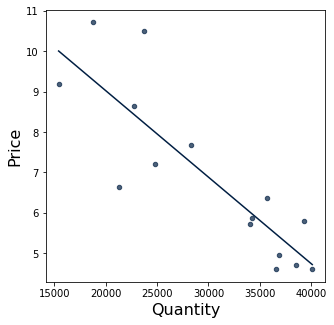

In [14]:
orangesRenamed.scatter("Quantity", "Price", fit_line = True)

We can see that there is a negative relationship between the two variables. Perfect! 
As a quick refresher, scatterplots can show positive, negative, or neutral correlations among two variables: 
- If two variables have a positive correlation, then as one variable increases, the other increases too. 
- If two variables have a negative correlation, then as one variable increass, the other decreases. 
- If two variables have a neutral correlation, then if one varible increases, the other variable stays constant. 

Note that scatterplots do not show or prove causation between two variables-- it is up to the data scientists to prove any causation. 

We will now quantify our demand curve using NumPy's polyfit function. `np.polyfit` returns an array of size 2, where the 0th index is the slope and 1st index is the $y$-intercept.

The general template for the demand curve is $y = mx + b$, where $m$ is the slope and $b$ is $y$-intercept. 
In economic terms, $m$ is the demand curve's slope that shows how the good's price affects the quantity demanded, and $b$ encompasses the effects of all of the exogenous factors that are not price that affect demand. 

In [16]:
np.polyfit(orangesRenamed.column("Quantity"),orangesRenamed.column("Price"), 1)

array([-2.14089690e-04,  1.33040264e+01])

This shows that the demand curve is $y = -0.000214x+ 13.3$. The slope is -0.000214 and $y$-intercept is 13.3. That means that as quantity increases by 1 unit (in this case, 1 ton), price decreases by 0.000214 units (in this case, \\$0.000214). 

We will now use SymPy to write out this demand curve. 

In [17]:
Q = sympy.Symbol("Q")
demand = -0.000214 * Q + 13.3
demand

13.3 - 0.000214*Q

Let's now assume that the supply curve is given by $y = 0.00023x + 0.8$. 
Supply curves show how much of a good suppliers are willing and able to supply at different prices.
Note that this supply curve is not based on data.

In [18]:
supply = 0.00023 * Q + 0.8
supply

0.00023*Q + 0.8

With the supply and demand curves known, we can solve the for equilibrium. 
The equilibrium is the point where the supply curve and demand curve intersect, and denotes the price and quantity of the good transacted in the market.
At this point, the quantity of the good that consumers desire to purchase is equivalent to the quantity of the good that producers supply; there is no shortage or surplus of the good at this quantity. 
The equilbrium consists of 2 components: the quantity equilbrium and price equilbrium. 
The quantity equilibrium is the quantity at which the supply curve and demand curve intersect.

Let's find the quantity equilibrium for this exercise.

In [19]:
Q_star = solve(demand, supply)
Q_star

28153.1531531532

This means that the number of tons of oranges that consumers want to purchase and producers want to provide in this market is about 28,153 tons of oranges. 

Similarly, the price equilibrium is the price at which the supply curve and demand curve intersect. The price of the good that consumers desire to purchase at is equivalent to the price of the good that producers want to sell at. There is no shortage of surplus of the product at this price.

Let's find the price equilibrium. 

In [20]:
demand.subs(Q, Q_star)
supply.subs(Q, Q_star)

7.27522522522523

This means that the price of oranges in tons that consumers want to purchase at and producers want to provide is about \\$7.27. 

Now that we have our demand and supply curves and price and quantity equilibriums, we can visualize them on a graph to see what they look like. 

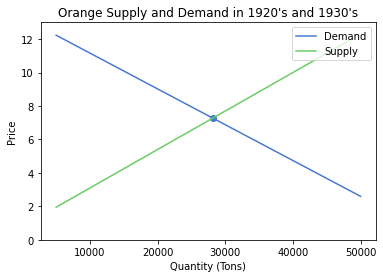

In [21]:
def plot_equation(equation, price_start, price_end, label=None):
    plot_prices = [price_start, price_end]
    plot_quantities = [equation.subs(list(equation.free_symbols)[0], c) for c in plot_prices]
    plt.plot(plot_prices, plot_quantities, label=label)
    
def plot_intercept(eq1, eq2):
    ex = sympy.solve(eq1-eq2)[0]
    why = eq1.subs(list(eq1.free_symbols)[0], ex)
    plt.scatter([ex], [why])
    return (ex, why)
    
plot_equation(demand, 5000, 50000, label = "Demand")
plot_equation(supply, 5000, 50000, label = "Supply")
plt.ylim(0,13)
plt.title("Orange Supply and Demand in 1920's and 1930's")
plt.xlabel("Quantity (Tons)")
plt.ylabel("Price")
plot_intercept(supply, demand)
plt.legend(loc = "upper right")
plt.show()

You can also practice on your own and download additional data sets here: http://users.stat.ufl.edu/~winner/datasets.html, courtesy of the University of Flordia's Statistics Department. 